### 0. Imports

In [1]:
cd ..

/Users/anna.schaar/phd/code/spatial-tools


In [2]:
from spatial_tools import read_seqfish
import spatial_tools.graph as graph
import spatial_tools.plotting as pl

import scanpy as sc

%load_ext autoreload
%autoreload 2
#%load_ext lab_black

# A. seqFISH

In [3]:
BASE_PATH = '/Users/anna.schaar/phd/datasets/seqfish/seqFISH-PLUS-master/'

### 1. Build spatial graphs

In [4]:
adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")
adata_ob

/Users/anna.schaar/opt/miniconda3/envs/spatial-tools/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2050 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y'
    obsm: 'spatial'

In [5]:
adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()
# use number of neighbors
graph.spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

In [6]:
adata_svz_5

AnnData object with n_obs × n_vars = 281 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y', 'Region'
    uns: 'spatial_neighbors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

### 2. Calculate centrality scores

In [7]:
graph.centrality_scores(adata_svz_5, cluster_key='louvain', connectivity_key='spatial_connectivities')

In [8]:
adata_svz_5

AnnData object with n_obs × n_vars = 281 × 10000
    obs: 'index', 'louvain', 'Field of View', 'Cell ID', 'X', 'Y', 'Region'
    uns: 'spatial_neighbors', 'louvain_centrality_scores'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

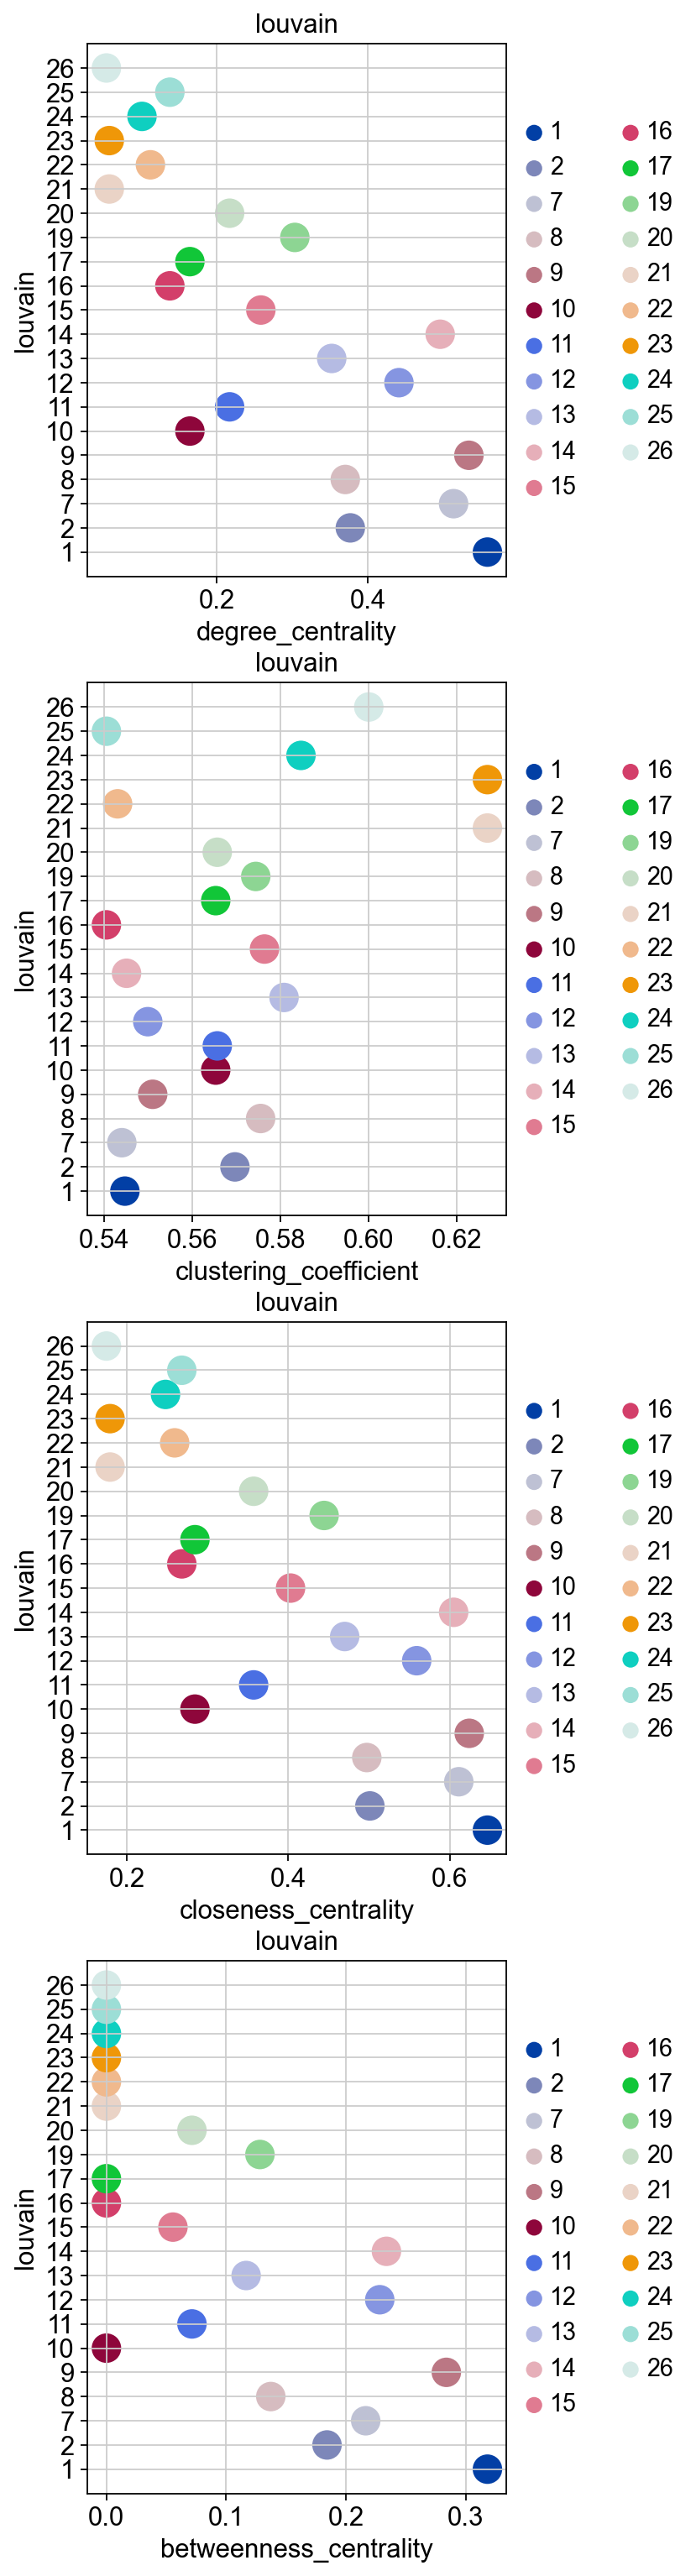

In [10]:
pl.centrality_scores(adata_svz_5, 'louvain')

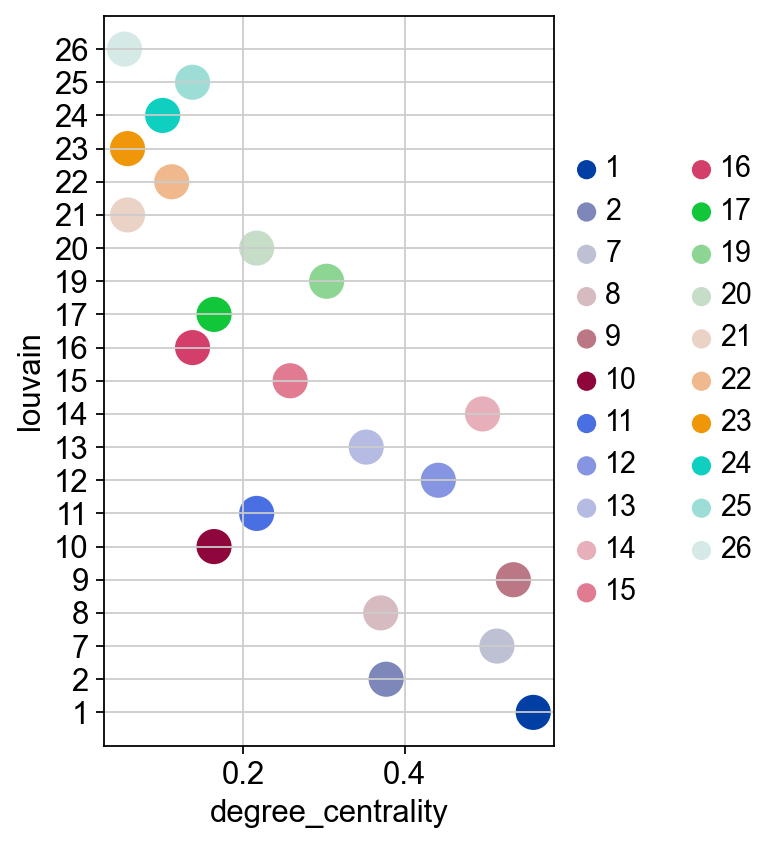

In [11]:
pl.centrality_scores(adata_svz_5, 'louvain', selected_score='degree_centrality')

### 3. Get interactions od clusters

In [12]:
graph.interaction_matrix(adata_svz_5, cluster_key='louvain', normalized=True)

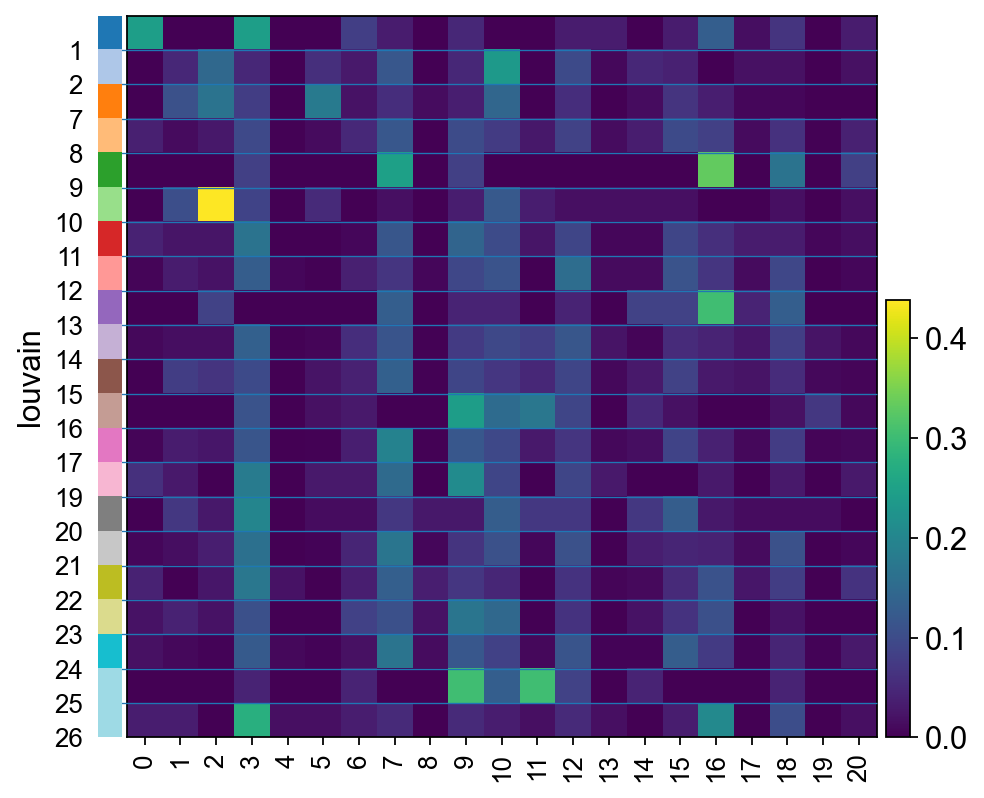

In [13]:
pl.interaction_matrix(adata_svz_5, 'louvain')

# B. Visium

In [14]:
adata = sc.datasets.visium_sge('V1_Mouse_Brain_Sagittal_Posterior_Section_2')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [15]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [16]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [17]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

In [18]:
adata

AnnData object with n_obs × n_vars = 3293 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [19]:
graph.spatial_connectivity(adata, obsm='spatial', n_rings=3)

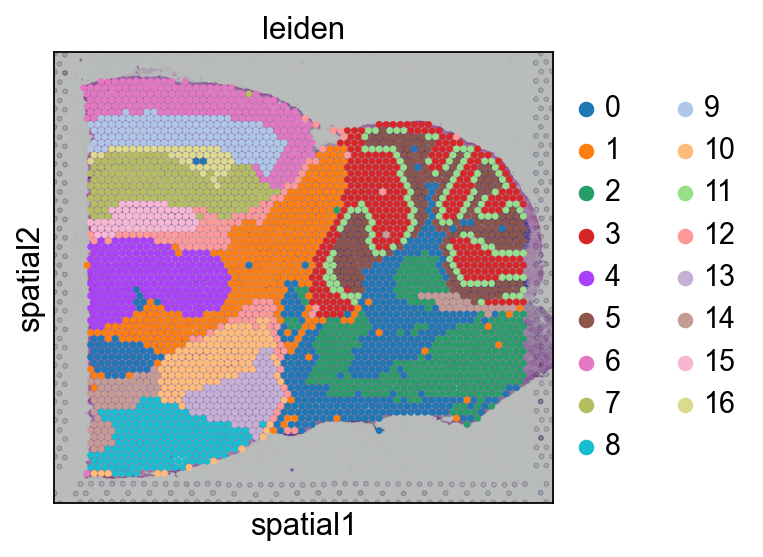

In [25]:
sc.pl.spatial(adata, color="leiden", size=1.5)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


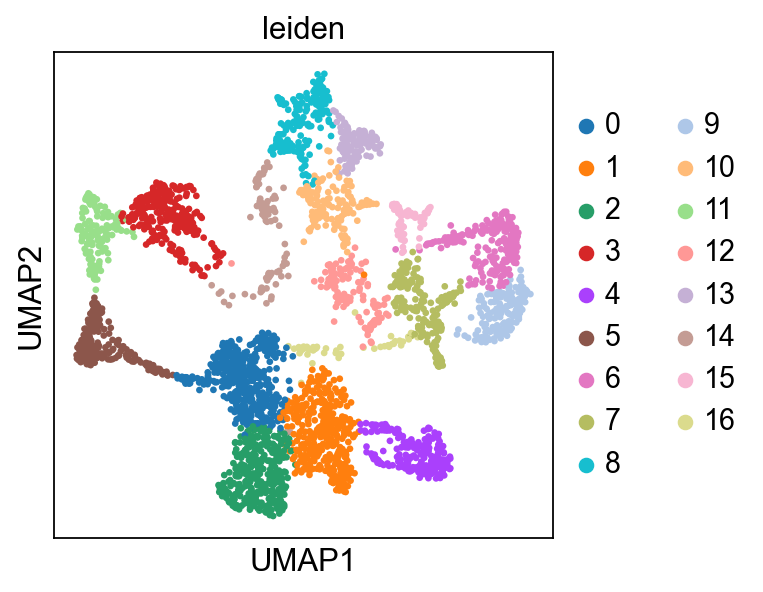

In [20]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='leiden')

In [21]:
graph.centrality_scores(adata,'leiden')

In [22]:
graph.interaction_matrix(adata,'leiden')

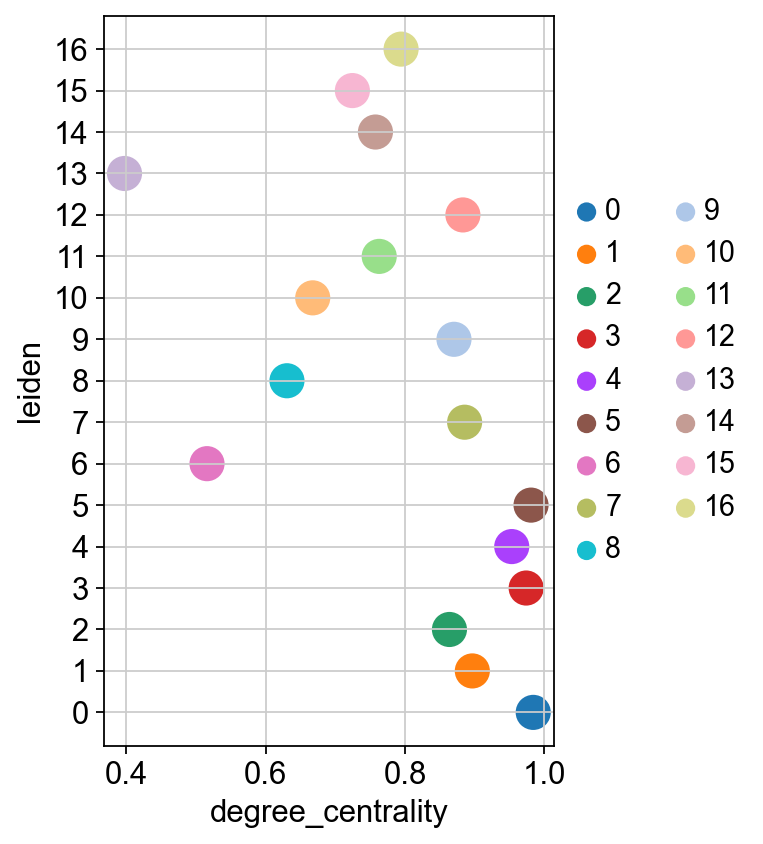

In [27]:
pl.centrality_scores(adata, 'leiden', selected_score='degree_centrality')

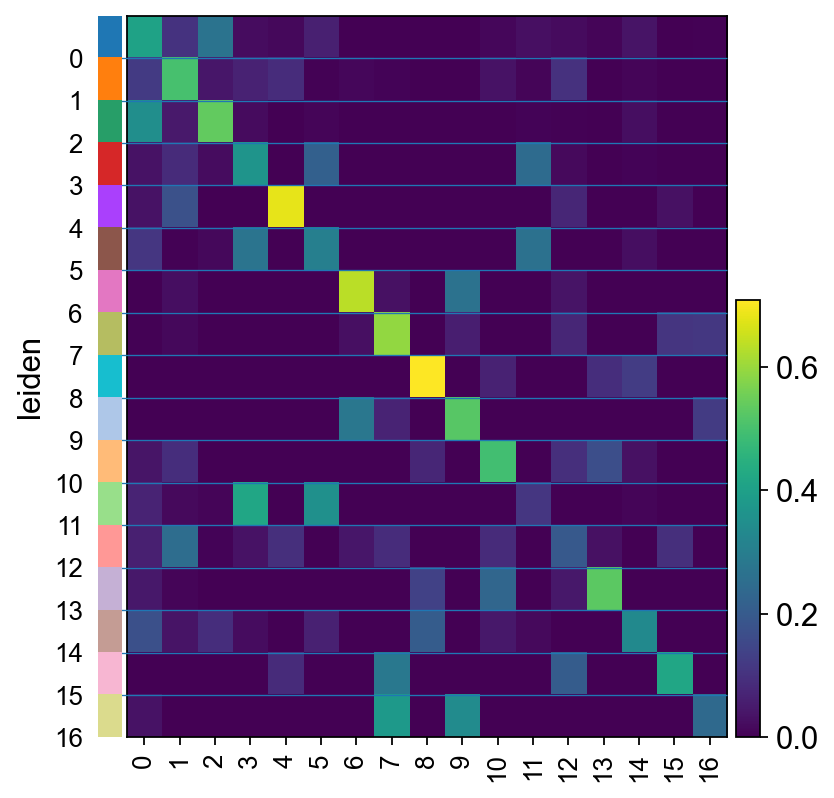

In [24]:
pl.interaction_matrix(adata, 'leiden')